# K-Means Clustering
        -common clustering technique, unsupervised learning algorithm, special case of Expectation Maximization algorithm.
        -goal is to partition data points among K number of clusters.
        -assign data pts to clusters such that sum of squares of distances of each data pt from its closest cluster is min.

### Implementation
        1.Initialize k centres randomly.
        2.Assign each data point to its nearest centre.
        3.update the location of centre based on the mean of points assigned to each centre.
        4.Repeat 2 and 3 untill convergence.

#### data generation

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
from sklearn.datasets import make_blobs

Y will not be used anywhere in the algorithm as k-means is an unsupervised algorithm

In [43]:
X,Y = make_blobs(n_samples = 250,n_features = 2,centers = 5,random_state = 3)
X.shape,Y.shape,type(X)

((250, 2), (250,), numpy.ndarray)

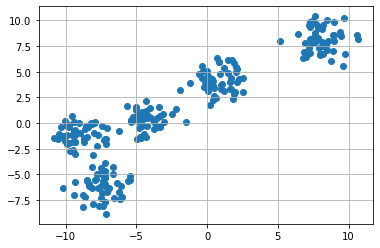

In [44]:
#plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

##### step1. initialize the clusters at random locations

In [134]:
k=5
colors = ["green","red","blue","yellow","orange"]
clusters = {}

for i in range(k):
    points = []
    center = 10*(2*np.random.random((X.shape[1],))-1)
    cluster = {
        "center":center,
        "points":points,
        "color":colors[i]
    }
    clusters[i] = cluster

In [135]:
clusters[0]

{'center': array([-3.38243418,  8.57054132]), 'points': [], 'color': 'green'}

##### step2. assign the data points to the nearest cluster 

In [136]:
def euclid_distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [137]:
def assign_pts_to_clusters(clusters,X):   #E-step
    for i in range(X.shape[0]):   
        distance = []
        curr_point = X[i]

        for j in range(k):
            d = euclid_distance(curr_point,clusters[j]['center'])
            distance.append(d)

        curr_cluster = np.argmin(distance)
        clusters[curr_cluster]['points'].append([curr_point[0],curr_point[1]])

##### step3. update the location of cluster centres based on mean of assigned points
        - update location of cluster centre.
        - nullify points list.

In [138]:
def update_cluster_location(clusters):     #M-step
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        
        if len(pts)>0 :  #if cluster has some points
            new_center = pts.mean(axis = 0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = [] #clear the list
        
        

In [139]:
def plot_graph(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        #print(pts.shape)
        #plot all points
        try:
            plt.scatter(pts[:,0],pts[:,1])
        except:
            pass  #for clusters which have 0 pts
        #plot cluster center
        cluster_center = np.array(clusters[i]['center'])
        plt.scatter(cluster_center[0],cluster_center[1],color = 'black' ,marker = "*")
    plt.show()

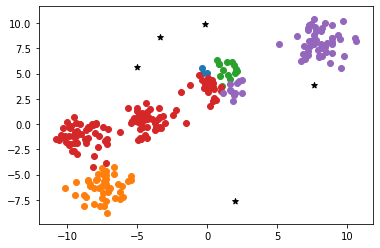

In [140]:
assign_pts_to_clusters(clusters,X)
plot_graph(clusters)

##### step4. repeat expextation maximisation untill convergence

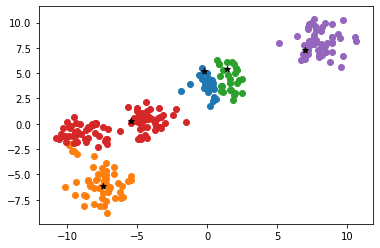

In [141]:
update_cluster_location(clusters)
assign_pts_to_clusters(clusters,X)
plot_graph(clusters)

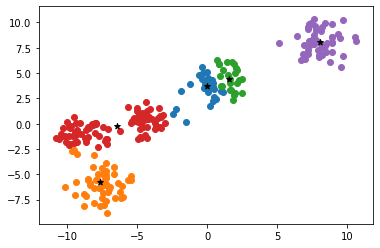

In [142]:
update_cluster_location(clusters)
assign_pts_to_clusters(clusters,X)
plot_graph(clusters)

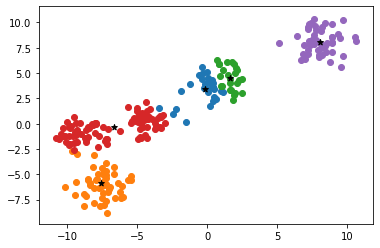

In [143]:
update_cluster_location(clusters)
assign_pts_to_clusters(clusters,X)
plot_graph(clusters)